# Data Science

***


WS 2023

Dr. Cristian Grozea


***

## Machine Learning

### Reinforcement Learning



# Course Plan

1. #Introduction to Machine Learning (ML)
    * #Examples of Applications
    * #Types of machine learning
    * #Issues around ML
    * #Testing and Validation
1. Classification and Regression
    * #Datasets
    * #Binary classification
    * #Accuracy measures
    * #Multiclass classification
1. Various model types and Training models
    * #Linear regression
    * #Polynomial regression
    * Regularisation (self-study - p.32-, p.155-, p.202-)
    * Logistic Regression (to be covered briefly)
    * Training Models
1. #Local learning/k-NN
1. Support Vector Machines (self-study - Chapter 5 p.175-)
1. Decision Trees
1. Ensemble Learning, Random Forest, XGBoost
1. Dimensionality Reduction
1. Unsupervised Learning
1. #Statistics: Definitions and Tools
1. #Neural Networks/Deep Learning
1. **[today] Reinforcement Learning, Deep Reinforcement Learning**
    


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(327643)

# Reinforcement Learning
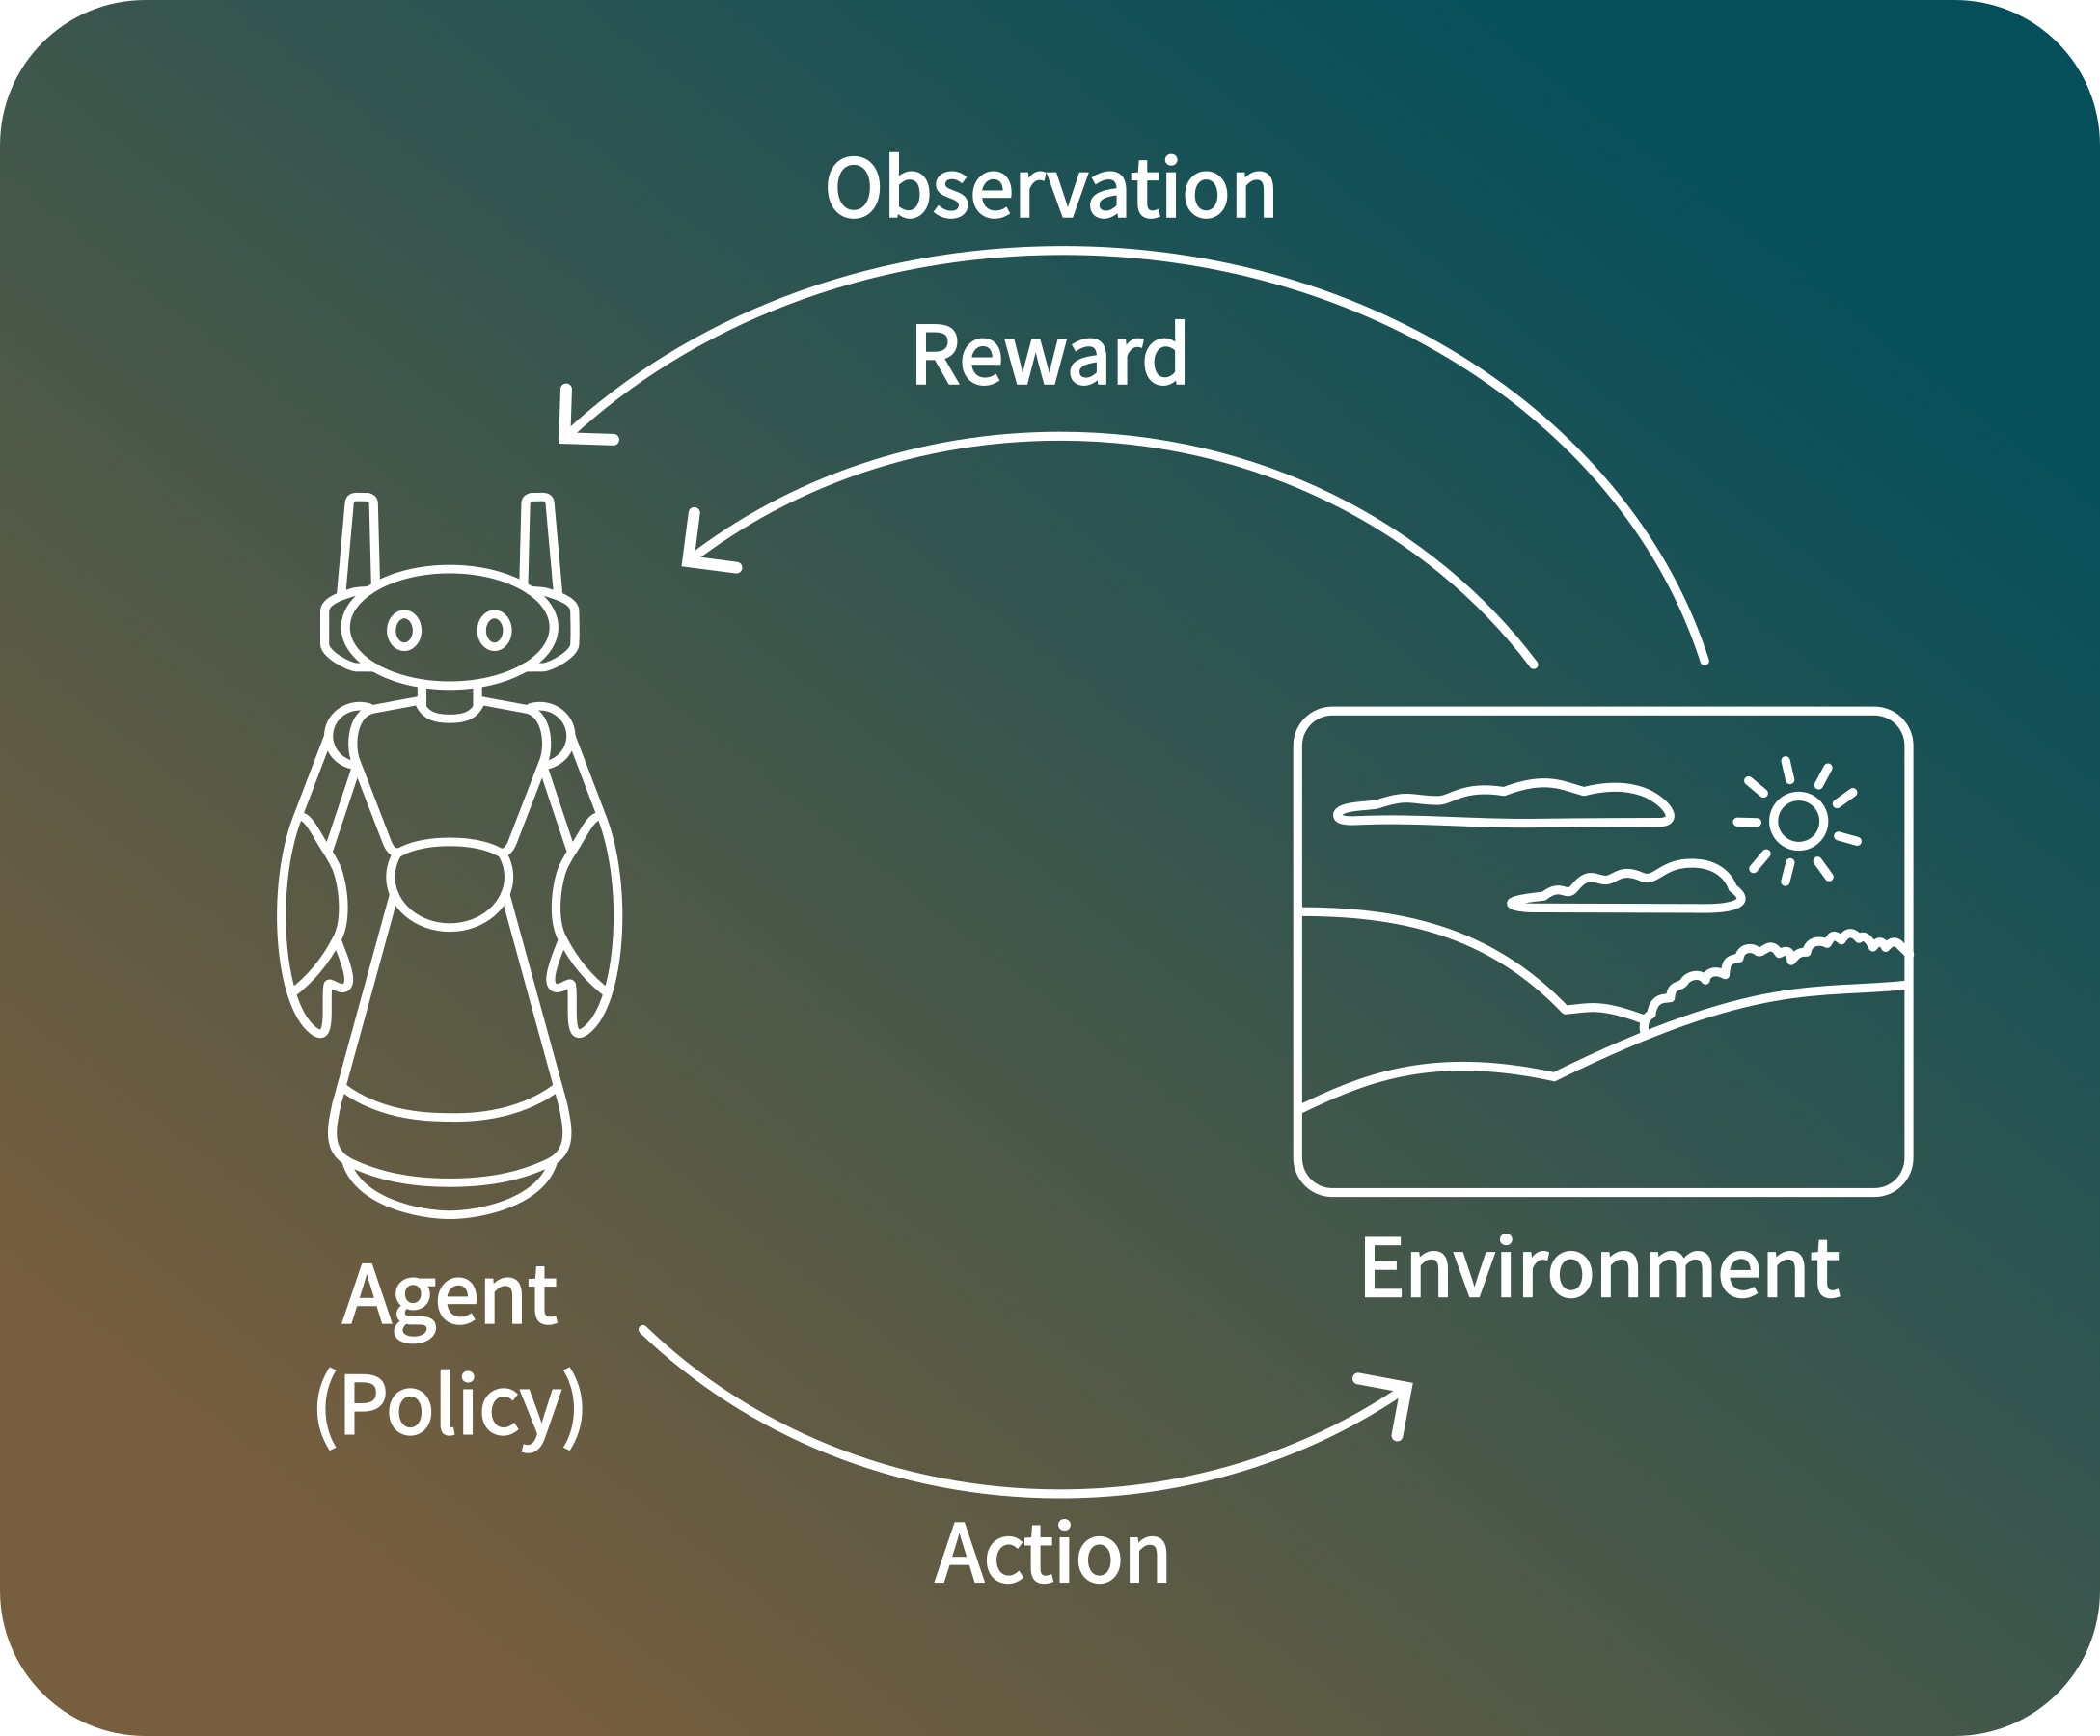
https://farama.org/assets/posts/2022-10-25-Announcing-The-Farama-Foundation/image1.png

### RL Concepts
Intelligent agents
- able to sense their environment
- able to perform actions

Environments
- usually simulation/simplification of real environments (self-driving cars, robotics)
- usually with discrete time steps

Reward
- loosely guiding the agents
- the aim of the agents is to maximize the received reward
- the reward is not furnished at every step but just from time to time or even only at the end of the simulation

Learning
- may require multiple complete simulations (sequential, in parallel or mixed).

Other Concepts
- Policy: "what to do when" rules/mechanism
- learning meaning finding optimal policies/tune policies



## Example 1: cartpole

Intelligent agent: our algorithm!

**Environment**
https://gymnasium.farama.org/environments/classic_control/cart_pole/
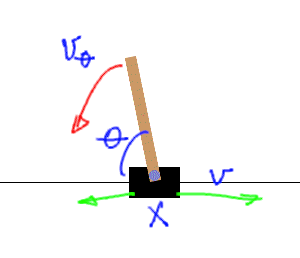
- 4 observables, two possible actions

**Reward**
- 1 for every time step survived
- cummulative reward is what matters

**Policy**

Given position $x$, angle $\theta$, speed $v$ and angular speed $v_\theta$ should you and with what probability:

    - move left? (action 1)
    - move right? (action 2)
    - do nothing?
    


Many more such environments in the 

Farama Gymnasium library:

    https://gymnasium.farama.org
~~~
import gymnasium as gym
~~~

### Atari Games

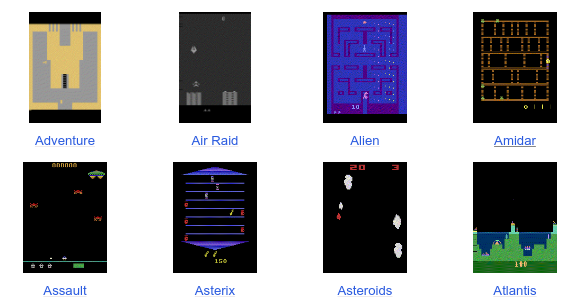
https://gymnasium.farama.org/environments/atari/complete_list/

With 2D physics
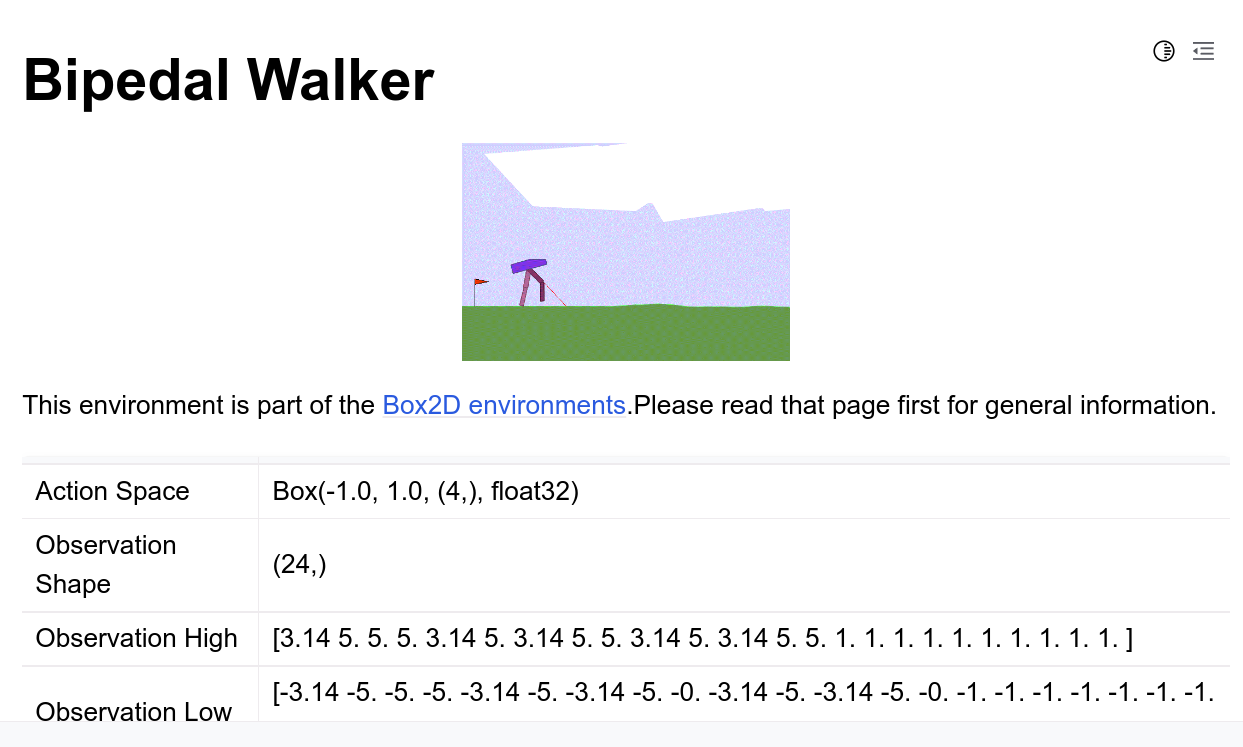

With 3D Physics

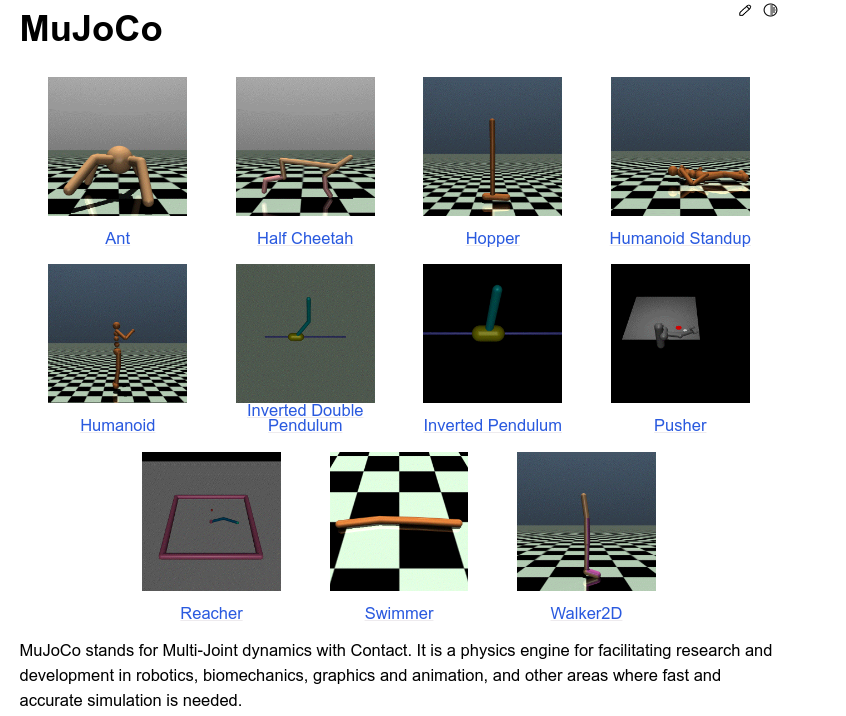
https://gymnasium.farama.org/environments/mujoco/

In [ ]:
#Live demo
import gymnasium as gym
env=gym.make('CartPole-v1',render_mode="human")
env.reset()
env.render()



In [ ]:
env.reset();env.render()

In [ ]:
env.step(0)

In [ ]:
obs,rew,done,ax,ax2=env.step(1)
env.render()
rew,done

In [ ]:
obs

In [ ]:
#Live demo
import gymnasium as gym
env=gym.make('CarRacing-v2',render_mode="human")
env.reset()
env.render()



In [ ]:
env.action_space.sample()

In [ ]:
env.reset();env.render()

In [ ]:
obs,rew,done,ax,ax2=env.step([0,1,0])
env.render()
rew,done

In [ ]:
#Live demo
import gymnasium as gym
env = gym.make("LunarLander-v2", render_mode="human")

In [ ]:
env.reset();env.render()

In [ ]:
#     0: do nothing
#     1: fire left orientation engine
#     2: fire main engine
#     3: fire right orientation engine
env.action_space.sample()

In [ ]:
obs,rew,done,ax,ax2=env.step(2)
env.render()
rew,done

### Robotics

#### Jiminy Gym
https://github.com/duburcqa/jiminy

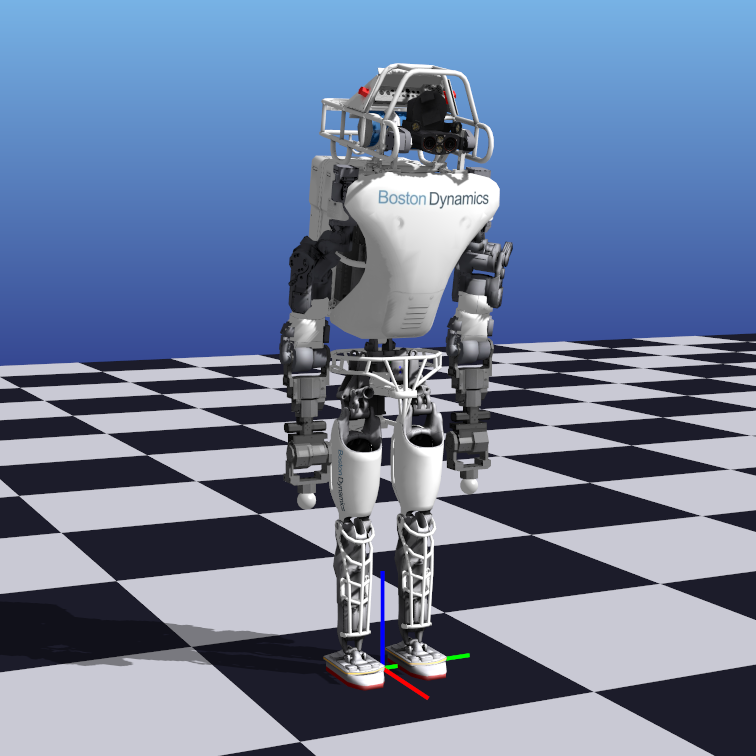



### Robotics and other Simulations in Omniverse

https://github.com/NVIDIA-Omniverse/OmniIsaacGymEnvs/

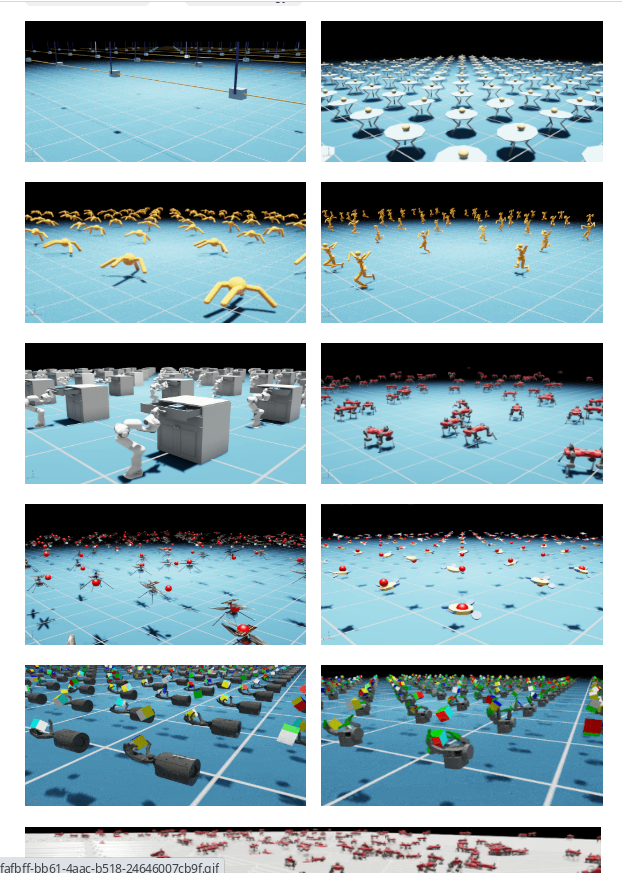




### Self Driving

https://github.com/Farama-Foundation/HighwayEnv

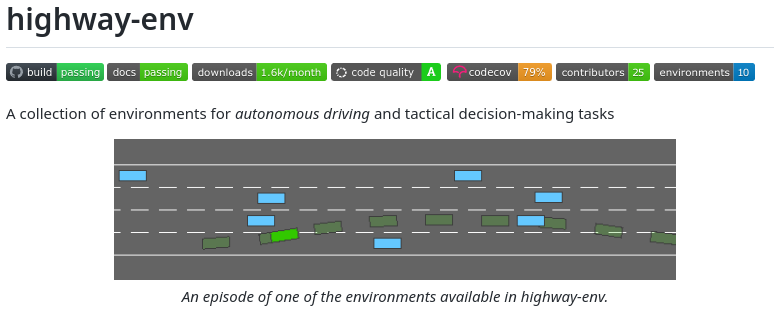

## Formalization

**Environment** (Markov Decision Process https://en.wikipedia.org/wiki/Markov_decision_process )

- State space $S$ (the set of all possible states)
- Action space $A$ (the set of all available actions)

- transition function:
    $tr: S\times A\times S\to [0,1]$
  
  such that $T(s,a,\cdot)$ is a probability distribution $\forall s\in S,\forall a\in A$
  $$T(s,a,s')=P(s_{t+1}=s'\mid s_t=s, a_t=a)$$
  
- reward function:
    $R: S\times A\times S\to \mathbb{R}$
    
    $R(s,a,s')$ is the reward obtained when transitioning from state $s$ to state $s'$ as a result of the action $a$.

**Actor**

- policy:  $\pi: S\times A\to [0,1]$ (stochastic policy)

    instead of $\pi: S\to A$  (deterministic, we use this notation too when the policy is deterministic)
    

#### Example Markov Decision Process
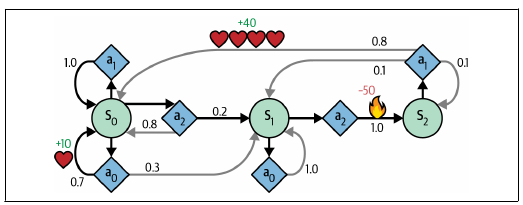
(source: Hands On ML Book 3rd ed.)

### Total future discounted reward

Let $\gamma\in(0,1)$

For a fixed policy $\pi$

The **value of a state** (it depends on the policy!):

$V_{\pi}(s)=\sum_{t=0}^\infty\gamma^t*r_t$, when starting in the state $s$.

A way to sum up all future rewards without diverging.

See https://en.wikipedia.org/wiki/Geometric_series


#### State values relations for our example

$V_0=\pi(0,0)(0.7(10+\gamma V_0)+0.3\gamma V_1)\\
    +\pi(0,1)\gamma V_0\\
    +\pi(0,2)\gamma(0.8V_0+0.2V_1)$
    
$V_1=\pi(1,0)\gamma V_1
    +\pi(1,2)(-50+\gamma V_2)$
    
$V_2=0.8*40+\gamma(0.1 V_2+0.1 V_1+0.8 V_0)$

Note that given a policy we can solve this system and get the value of all states.

#### Optimal policy (assuming knowledge of $V$ for it)
$V_0=\pi(0,0)(0.7(10+\gamma V_0)+0.3V_1)\\
    +\pi(0,1)\gamma V_0\\
    +\pi(0,2)\gamma(0.8V_0+0.2V_1)$

In state 0 choose deterministically the action that maximizes its corresponding branch.

Similarly for the other states.

## Iterative algorithms for solving MDP
- for finite (and rather small) state and action spaces
- assuming full knowledge of the transition probabilities and of the rewards

$$Q(s,a):= (notation)\sum_{s'\in S}T(s,a,s')(R(s,a,s')+\gamma V(s'))$$ 
Q is the expected reward when chosing in state $s$ the action $a$ and proceeding according to the policy.

For the optimal policy:

$$V(s)=\sum_{a\in A}\pi_*(s,a)Q(s,a)$$

$$\pi_*(s,a)=\left\{
\begin{array}{ll}
    1 & \mathrm{when\hspace{0.2cm}} a=argmax_{a\in A}Q(s,a); \\
    0 & \mathrm{otherwise}.
\end{array} 
\right. $$

also written more compact as $$\pi_*(s)=argmax_{a\in A}Q(s,a)$$

Nonlinear system of equations in optimal values $V$ and optimal policy $\pi_*$

One can start with an aproximation and keep improving it using the equations.

### Method 1: Value Iteration

- Start with arbitrary state values (e.g. all states valued at 0)
- iterate the joint equation (Bellman Equation) until it stabilizes

$$V(s)=\max_{a\in A}\sum_{s'\in S}T(s,a,s')(R(s,a,s')+\gamma V(s'))$$


### Method 2: Policy Iteration

Repeat step 1 (value adjustment) and step 2 (policy adjustment) until convergence. 

We observed that for a given policy the values can be obtained without iterations, by solving the linear system defined by the first equation.

## Complications in RL vs. MDP

- in RL we **don't know** the transition function $T$ nor necessarily the reward function $r$.
- we are supposed to estimate on the way whatever we need, we rather estimate $Q$ 

$$Q(s,a)=\sum_{s'\in S}T(s,a,s')(R(s,a,s')+\gamma V(s'))$$

Q is the expected (average) performance when in state $s$ we choose the action $a$

By exploring multiple possible actions, each multiple times, we can adjust/correct iteratively the values stored in the table $Q$.

This procedure is called **Q-learning** https://en.wikipedia.org/wiki/Q-learning

# Q-Learning

$$Q(s,a)=\sum_{s'\in S}T(s,a,s')(R(s,a,s')+\gamma V(s'))$$

$$V(s)=max_{a\in A}Q(s,a)$$

$$\pi_*(s)=argmax_{a\in A}Q(s,a)$$

Adjust $Q(s,a)$ based on behaviour in simulation like a running moving average (low-pass filter).

Assume we are in state $s$, perform action $a$ observe reward $r$ and transition to state $s'$.

Then $$Q_{t+1}(s,a)=(1-\alpha)Q_{t}(s,a)+\alpha(r+\gamma max_{a'\in A}Q_t(s',a'))$$

where $\alpha>0$ is a learning rate (speed of adjustement).

Low $\alpha$ => high smoothing, large $\alpha$ => noisy behaviour.


# Q-Learning

Pseudocode from https://web.archive.org/web/20191220210141/https://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/

initialize $Q[numstates,numactions]$ arbitrarily

observe initial state $s$

repeat

-  select and carry out an action $a$

- observe reward $r$ and new state $s'$

-  $Q[s,a] \leftarrow Q[s,a] + \alpha(r + \gamma max_{a'} Q[s',a'] - Q[s,a])$

-  $s \leftarrow s'$
    
until terminated

# Deep Q-Learning

As per https://web.archive.org/web/20191220210141/https://neuro.cs.ut.ee/demystifying-deep-reinforcement-learning/
    
= Q-learning using a neural network as estimator for $Q$ instead of maintaining a huge table.

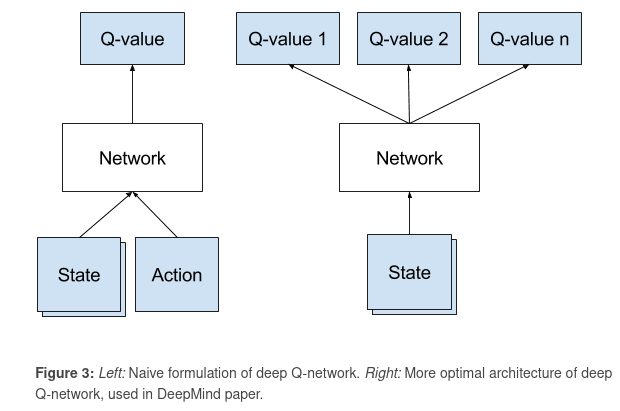
http://arxiv.org/abs/1312.5602 Playing Atari with Deep Reinforcement Learning


## Deep Q-Learning as Neural Network Regression

What are the labels/targets for the regression?

We don't know the true target values $Q$ which correspond to the optimal policy ...

Use instead the unknown target these labels: $r + \gamma max_{a'} Q[s',a']$

Very noisy as an estimator of the expected long-term reward that follows when in the state $s$ we choose the action $a$.

But the required integration/smoothing could come from a low learning rate.
